# MAGIC Camera Geometry display using CTAPIPE

We take MAGIC camera in MAGIC coordinate system and just display it using ctapipe

In [17]:
from subprocess import call
import os
os.system("export CTAPIPE_SVC_PATH=$CTAPIPE_SVC_PATH:$PWD")
os.system("echo $CTAPIPE_SVC_PATH")
# Change the path "DIR_OF_THIS_SCRIPT"  
os.environ["CTAPIPE_SVC_PATH"]="/photon1/users/labsaha/Dropbox/ctapipe"

from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
import matplotlib.pyplot as plt
%matplotlib inline

# Display of MAGIC Camera in CTAPIPE

** This is to understand if the camera is appearing in CTAPIPE display as expected **

# STEP 1 
**(MAGIC Camera information without changing the frame of reference, .i.e. what we see in MARS)**

An angle of rotation 19.1 is given all pixels

/photon1/users/labsaha/miniconda/envs/cta-dev/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


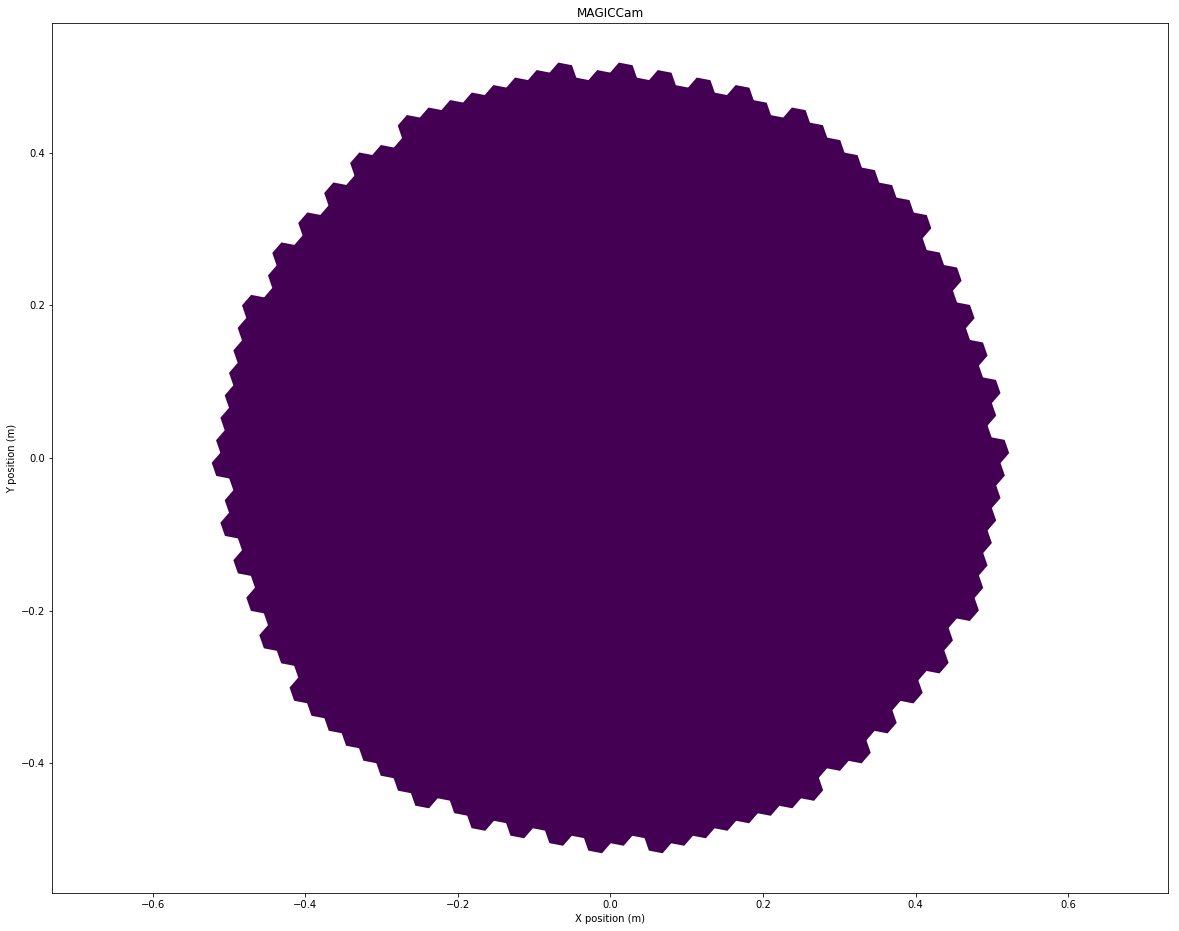

In [19]:
import numpy as np
from astropy.io import fits
import astropy.units as u
f = open('./magic_camera_info.txt', 'r')

x=[]
y=[]
j=[]
A=[]
for line in f:
    line = line.strip()
    columns = line.split()
    j.append(int(columns[0]))
    x.append(float(columns[1]))
    y.append(float(columns[2]))
    A.append(float(columns[3]))

angle = 19.1 #.11460397105

x1 = np.array(x)
y1 = np.array(y)

A = 7.79422851562500000e+02*1.0e-6 
#x = x/1.0e-3
#y=  y/1.0e-3
Area=np.repeat(A, 1039)
#print(y)
f.close()

#for i in range(100):
#    print(x2[i],y2[i])

header= fits.Header()


c1 = fits.Column(name='pix_id', array=np.array(j),  format='K')
c2 = fits.Column(name='pix_x', array=np.array(x1)*1.0e-3, unit='m', format='D')
c3 = fits.Column(name='pix_y', array=np.array(y1)*1.0e-3, unit='m', format='D')
c4 = fits.Column(name='pix_area', array=np.array(Area), unit='m^2', format='D')
t = fits.BinTableHDU.from_columns([c1, c2, c3, c4])

t.header['PIX_TYPE'] = 'hexagonal'
t.header['CAM_ID'] = 'MAGICCam'
t.header['CAM_ROT'] = 0.0
t.header['PIX_ROT'] = +angle

t.writeto('MAGICCam_1.camgeom.fits',clobber=True)

plt.figure(figsize=(20,16))
camgeom = CameraGeometry.from_name("MAGICCam_1")
disp = CameraDisplay(camgeom)
disp.show()

# STEP 2
**(MAGIC Camera information without changing the frame of reference, .i.e. what we see in MARS)**

An angle of rotation **-19.1** is given to all pixels

This display is difinitely not appropriate. We see holes in between the pixels. Hence, the pixel of 
rotation should be always positive ('+')

/photon1/users/labsaha/miniconda/envs/cta-dev/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


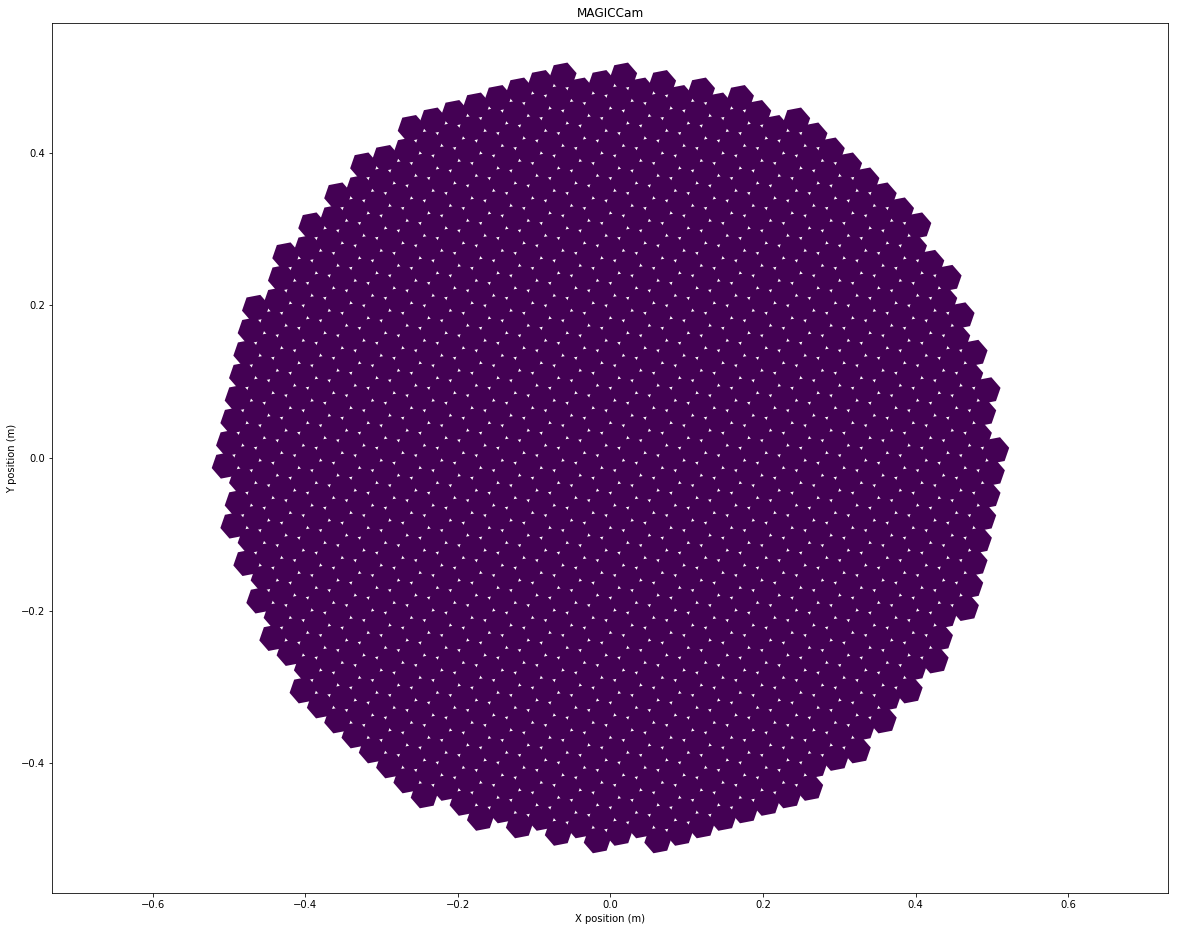

In [23]:
import numpy as np
from astropy.io import fits
import astropy.units as u
f = open('./magic_camera_info.txt', 'r')

x=[]
y=[]
j=[]
A=[]
for line in f:
    line = line.strip()
    columns = line.split()
    j.append(int(columns[0]))
    x.append(float(columns[1]))
    y.append(float(columns[2]))
    A.append(float(columns[3]))

angle = 19.1 #.11460397105

x1 = np.array(x)
y1 = np.array(y)

A = 7.79422851562500000e+02*1.0e-6 
Area=np.repeat(A, 1039)

f.close()

header= fits.Header()


c1 = fits.Column(name='pix_id', array=np.array(j),  format='K')
c2 = fits.Column(name='pix_x', array=np.array(x1)*1.0e-3, unit='m', format='D')
c3 = fits.Column(name='pix_y', array=np.array(y1)*1.0e-3, unit='m', format='D')
c4 = fits.Column(name='pix_area', array=np.array(Area), unit='m^2', format='D')
t = fits.BinTableHDU.from_columns([c1, c2, c3, c4])

t.header['PIX_TYPE'] = 'hexagonal'
t.header['CAM_ID'] = 'MAGICCam'
t.header['CAM_ROT'] = 0.0
t.header['PIX_ROT'] = -angle

t.writeto('MAGICCam_2.camgeom.fits',clobber=True)

plt.figure(figsize=(20,16))
camgeom = CameraGeometry.from_name("MAGICCam_2")
disp = CameraDisplay(camgeom)
disp.show()

# STEP 3
**(MAGIC Camera information changing the frame of reference to HESS.)**

In the HESS reference frame following transfomation should be given

xHess = -yMagic

yHess = -xMagic

An angle of rotation +19.1 is given to all pixels after the transformation is done. The pixel rotation
is given using ctapipe 

Once can manually give the pixel rotation using angle **-19.1** and then the result will be the same. 
This indicates that the +19.1 rotation in ctapipe is basically de-rotation of the syatem. 
This is convention one should consider here.


This display is difinitely not appropriate. We see also holes in between the pixels. 



This also seems to be inappropriate (NOT SURE HOW TO SOLVE THE ISSUE)


/photon1/users/labsaha/miniconda/envs/cta-dev/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


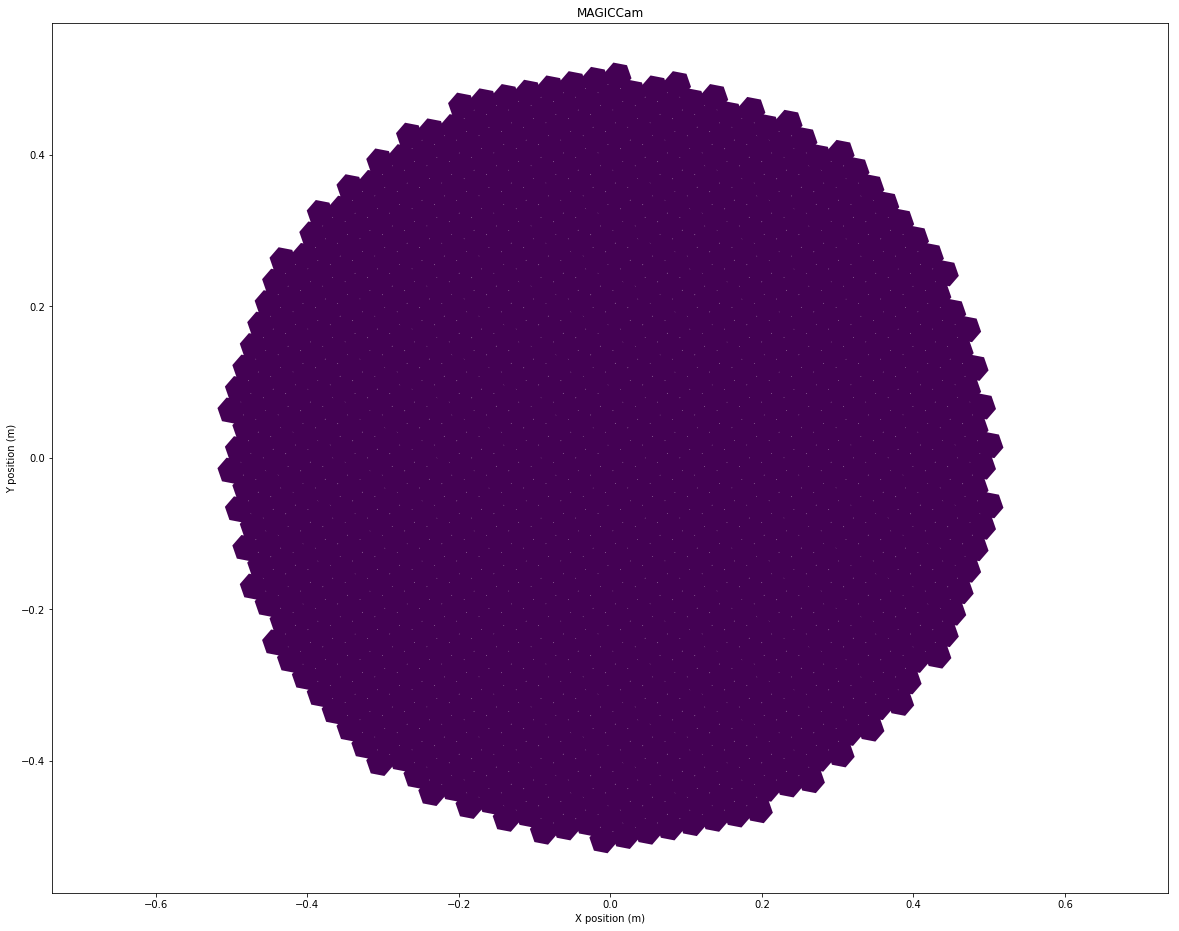

In [27]:
import numpy as np
from astropy.io import fits
import astropy.units as u
f = open('./magic_camera_info.txt', 'r')

x=[]
y=[]
j=[]
A=[]
for line in f:
    line = line.strip()
    columns = line.split()
    j.append(int(columns[0]))
    x.append(float(columns[1]))
    y.append(float(columns[2]))
    A.append(float(columns[3]))

angle = 19.1 #.11460397105

x1 = np.array(x)
y1 = np.array(y)




xMagic2Hess = -y1
yMagic2Hess = -x1

#x2 = -y1
#y2 = -x1

#x3 = np.cos(+angle*u.deg)*x2 - np.sin(+angle*u.deg)*y2
#y3 = np.cos(+angle*u.deg)*y2 + np.sin(+angle*u.deg)*x2


A = 7.79422851562500000e+02*1.0e-6 
#x = x/1.0e-3
#y=  y/1.0e-3
Area=np.repeat(A, 1039)
#print(y)
f.close()

#for i in range(100):
#    print(x2[i],y2[i])

header= fits.Header()


c1 = fits.Column(name='pix_id', array=np.array(j),  format='K')
c2 = fits.Column(name='pix_x', array=np.array(xMagic2Hess)*1.0e-3, unit='m', format='D')
c3 = fits.Column(name='pix_y', array=np.array(yMagic2Hess)*1.0e-3, unit='m', format='D')
#c2 = fits.Column(name='pix_x', array=np.array(x3)*1.0e-3, unit='m', format='D')
#c3 = fits.Column(name='pix_y', array=np.array(y3)*1.0e-3, unit='m', format='D')
c4 = fits.Column(name='pix_area', array=np.array(Area), unit='m^2', format='D')
c4 = fits.Column(name='pix_area', array=np.array(Area), unit='m^2', format='D')
t = fits.BinTableHDU.from_columns([c1, c2, c3, c4])

t.header['PIX_TYPE'] = 'hexagonal'
t.header['CAM_ID'] = 'MAGICCam'
t.header['CAM_ROT'] = 0.0
t.header['PIX_ROT'] = angle

t.writeto('MAGICCam_3.camgeom.fits',clobber=True)

plt.figure(figsize=(20,16))
camgeom = CameraGeometry.from_name("MAGICCam_3")
disp = CameraDisplay(camgeom)
disp.show()

# STEP 4
**(MAGIC Camera information changing the frame of reference to HESS.)**

Fisrt an angle of rotation -19.1 is given manually to all pixels. Then the coordinates are 
transformed to HESS reference frame.

In the HESS reference frame following transfomation should be given after the derotation of the pixel 
by **19.1** deg

xHess = -yMagic

yHess = -xMagic


This display is difinitely not appropriate. We see also holes in between the pixels. 

This also seems to be inappropriate (NOT SURE HOW TO SOLVE THE ISSUE; might be missing some 
                                    important transformation related things)


/photon1/users/labsaha/miniconda/envs/cta-dev/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


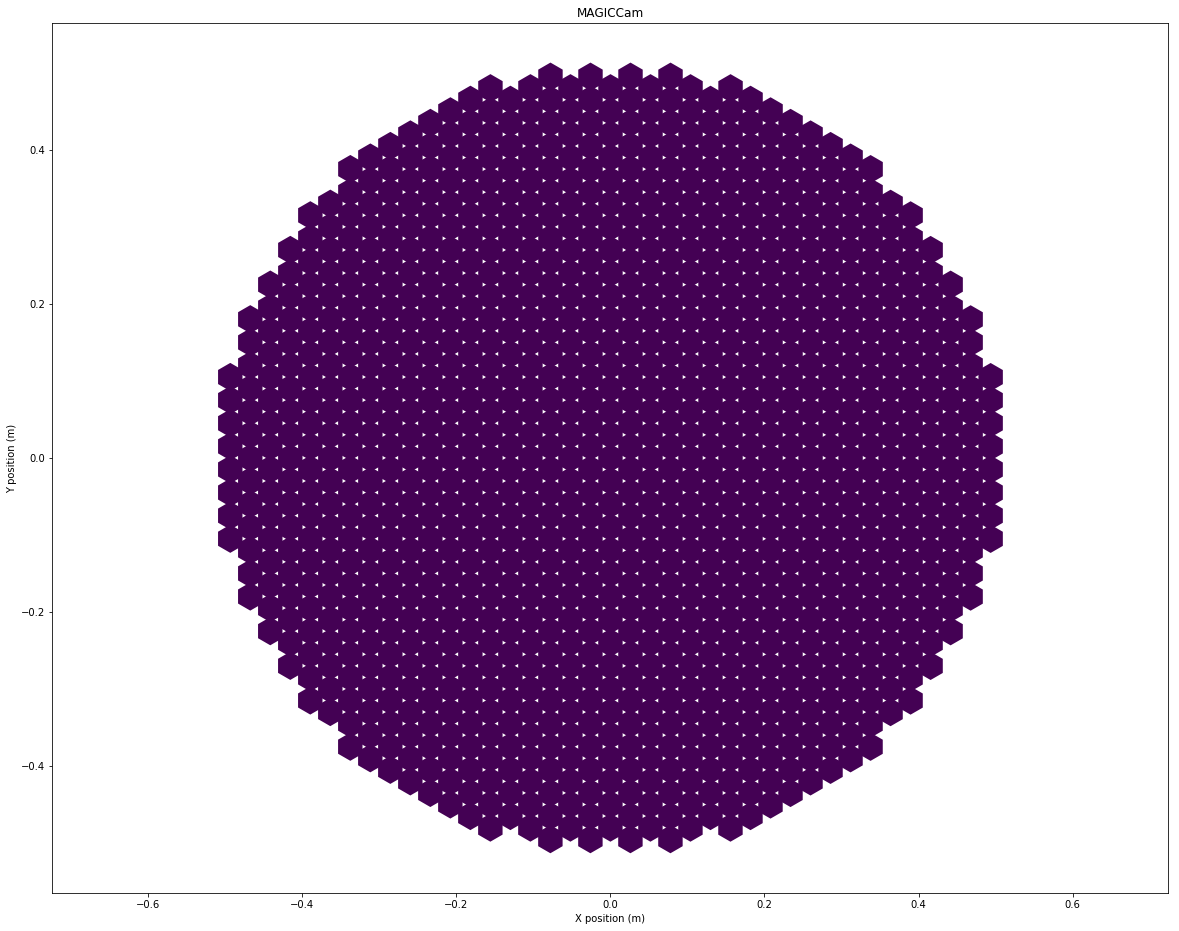

In [31]:
import numpy as np
from astropy.io import fits
import astropy.units as u
f = open('./magic_camera_info.txt', 'r')

x=[]
y=[]
j=[]
A=[]
for line in f:
    line = line.strip()
    columns = line.split()
    j.append(int(columns[0]))
    x.append(float(columns[1]))
    y.append(float(columns[2]))
    A.append(float(columns[3]))

angle = -19.1 #.11460397105

x1 = np.array(x)
y1 = np.array(y)

x2 = np.cos(+angle*u.deg)*x1 - np.sin(+angle*u.deg)*y1
y2 = np.cos(+angle*u.deg)*y1 + np.sin(+angle*u.deg)*x1

# x2,y2 is pixel coordinates in a de-rotated frame 


# Now we can tranfrom x2,y2 to HESS frame

x3= -y2
y3= -x2


A = 7.79422851562500000e+02*1.0e-6 
Area=np.repeat(A, 1039)

f.close()

header= fits.Header()


c1 = fits.Column(name='pix_id', array=np.array(j),  format='K')
c2 = fits.Column(name='pix_x', array=np.array(x3)*1.0e-3, unit='m', format='D')
c3 = fits.Column(name='pix_y', array=np.array(y3)*1.0e-3, unit='m', format='D')
c4 = fits.Column(name='pix_area', array=np.array(Area), unit='m^2', format='D')
t = fits.BinTableHDU.from_columns([c1, c2, c3, c4])

t.header['PIX_TYPE'] = 'hexagonal'
t.header['CAM_ID'] = 'MAGICCam'
t.header['CAM_ROT'] = 0.0
t.header['PIX_ROT'] = 0.0

t.writeto('MAGICCam_4.camgeom.fits',clobber=True)

plt.figure(figsize=(20,16))
camgeom = CameraGeometry.from_name("MAGICCam_4")
disp = CameraDisplay(camgeom)
disp.show()